# Homework for week02

> The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

We'll be using the same dataset from homework-01.

> In this homework, we will use the California Housing Prices from Kaggle.


In [1]:
import numpy as np
import pandas as pd

In [2]:
# !wget -P ../data https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
data = pd.read_csv('../data/housing.csv')
print(f'{data.shape =}')

data.shape =(20640, 10)


## EDA

<Axes: >

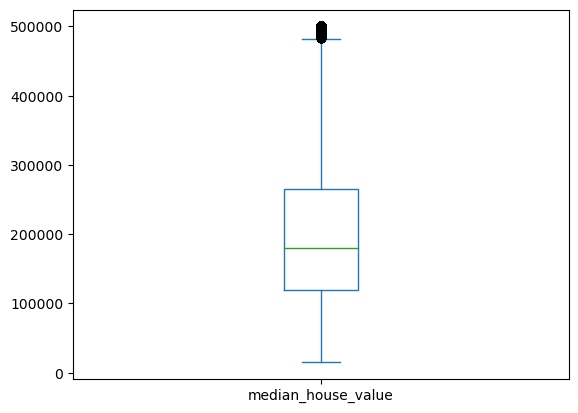

In [4]:
data['median_house_value'].plot.box()

In [5]:
data['median_house_value'].describe(percentiles=[.1, .25, .5, .75, .9])

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
10%       82300.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
90%      376600.000000
max      500001.000000
Name: median_house_value, dtype: float64

> Look at the `median_house_value` variable. Does it have a long tail? 

A: Yes.

<Axes: ylabel='Frequency'>

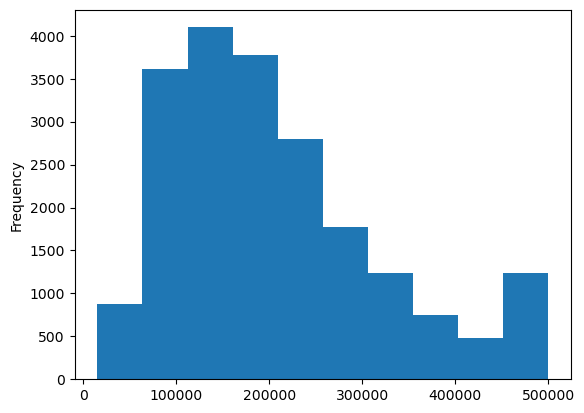

In [6]:
data['median_house_value'].plot.hist()

b:\mambaforge\envs\zoomcamp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
b:\mambaforge\envs\zoomcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

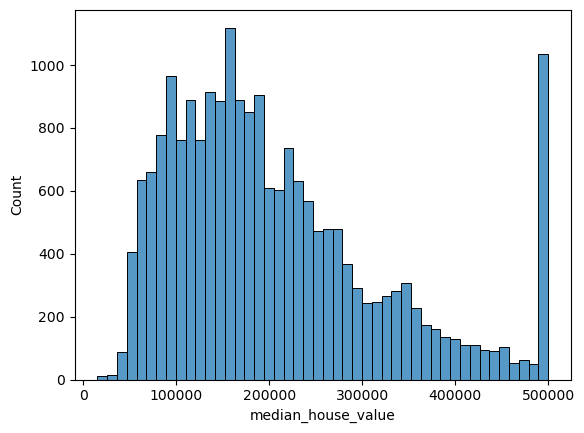

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.histplot(data.median_house_value)

## Preparing the dataset

> First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`
> 
> Next, use only the following columns:
>
> * `'latitude'`,
> * `'longitude'`,
> * `'housing_median_age'`,
> * `'total_rooms'`,
> * `'total_bedrooms'`,
> * `'population'`,
> * `'households'`,
> * `'median_income'`,
> * `'median_house_value'`

In [8]:
ocean_inland = data.query("ocean_proximity == '<1H OCEAN' or ocean_proximity == 'INLAND'")
print(ocean_inland['ocean_proximity'].value_counts())
print(ocean_inland.columns)

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [9]:
df = ocean_inland.drop(labels='ocean_proximity', axis=1)

In [10]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


### Question 1

q: There's one feature with missing values. What is it?

a: `total_bedrooms`

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

Q: What's the median (50% percentile) for variable 'population'?

A: 1195

In [12]:
df.population.median()

1195.0

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [13]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)

15687 9413 3137 3137


In [14]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val+n_train]]
df_test = df.iloc[idx[n_val+n_train:]]
print(len(df_train), len(df_val), len(df_test))

9413 3137 3137


In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
print(len(y_train), len(y_val), len(y_test))

9413 3137 3137


In [18]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)

def shuffle_split(seed=42):
    np.random.seed(seed)
    np.random.shuffle(idx)
    train = df.iloc[idx[:n_train]]
    val = df.iloc[idx[n_train:n_val+n_train]]
    test = df.iloc[idx[n_val+n_train:]]

    # print(len(train), len(val), len(test))
    return train, val, test


def prepare_X_y(df, fill):

    df = df.fillna(fill)
    y = np.log1p(df.median_house_value.values)
    del df['median_house_value']
    X = df.values
    # print(X.shape, y.shape)
    return X, y


### Question 3

1. We need to deal with missing values for the column from Q1.
1. We have two options: fill it with 0 or with the mean of this variable.
1. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
1. For computing the mean, use the training only!
1. Use the validation dataset to evaluate the models and compare the RMSE of each option.
1. Round the RMSE scores to 2 decimal digits using round(score, 2)
1. Which option gives better RMSE?

A: both RMSE are the same

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


#### fillna(0)

In [21]:
train, val, test = shuffle_split(42)
X_train_0, y_train = prepare_X_y(train, 0)
w0, w = train_linear_regression(X_train_0, y_train)

X_val_0, y_val = prepare_X_y(val, 0)
y_pred = w0 + X_val_0.dot(w)
rmse_0 = rmse(y_val, y_pred)


#### fillna(mean)

In [22]:
mean = df_train['total_bedrooms'].mean()

X_train_mean, y_train = prepare_X_y(train, mean)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean, y_val = prepare_X_y(val, mean)
y_pred = w0 + X_val_mean.dot(w)
rmse_mean = rmse(y_val, y_pred)

print(f'rmse_0 = {round(rmse_0, 2)}')
print(f'rmse_mean = {round(rmse_mean, 2)}')

rmse_0 = 0.34
rmse_mean = 0.34


### Question 4

1. Now let's train a regularized linear regression.
1. For this question, fill the NAs with 0.
1. Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
1. Use RMSE to evaluate the model on the validation dataset.
1. Round the RMSE scores to 2 decimal digits.
1. Which r gives the best RMSE?

If there are multiple options, select the smallest r.

A: r=0, with rmse=0.34084790341590543

In [23]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [24]:
rmse_scores = {}
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for num in r:
    X_train, y_train = prepare_X_y(train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, num)

    X_val, y_val = prepare_X_y(val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f'for r = {num}, rmse = {score:.2f}')
    rmse_scores[num] = score

print()
print(sorted(rmse_scores.items(), key=lambda x:x[1]))

for r = 0, rmse = 0.34
for r = 1e-06, rmse = 0.34
for r = 0.0001, rmse = 0.34
for r = 0.001, rmse = 0.34
for r = 0.01, rmse = 0.34
for r = 0.1, rmse = 0.34
for r = 1, rmse = 0.34
for r = 5, rmse = 0.35
for r = 10, rmse = 0.35

[(0, 0.34084790341590543), (1e-06, 0.34084790618218563), (0.0001, 0.3408481800557182), (0.001, 0.34085069218459585), (0.01, 0.34087793005233935), (0.1, 0.3412862042033381), (1, 0.3448958327639019), (5, 0.34773980704846963), (10, 0.348314983351884)]


In [25]:
print(sorted(list(rmse_scores.values())))

[0.34084790341590543, 0.34084790618218563, 0.3408481800557182, 0.34085069218459585, 0.34087793005233935, 0.3412862042033381, 0.3448958327639019, 0.34773980704846963, 0.348314983351884]


### Question 5

1. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
1. Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
1. For each seed, do the train/validation/test split with 60%/20%/20% distribution.
1. Fill the missing values with 0 and train a model without regularization.
1. For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
1. What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
1. Round the result to 3 decimal digits (round(std, 3))

A: 0.005


In [47]:
def evaluate(train, val, fill=0):
    X_train, y_train = prepare_X_y(train, fill)
    w0, w = train_linear_regression(X_train, y_train)

    X_val, y_val = prepare_X_y(val, fill)
    y_pred = w0 + X_val.dot(w)
    result = rmse(y_val, y_pred)
    print(f'rmse = {result:.4f}')
    return round(result, 3)


In [48]:
scores = []

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for s in seed_values:
    train, val, test = shuffle_split(s)
    print(f'seed = {s}')
    scores.append(evaluate(train, val, 0))
    print()

print()
print(scores)
    

seed = 0
rmse = 0.3461

seed = 1
rmse = 0.3414

seed = 2
rmse = 0.3398

seed = 3
rmse = 0.3325

seed = 4
rmse = 0.3337

seed = 5
rmse = 0.3355

seed = 6
rmse = 0.3428

seed = 7
rmse = 0.3346

seed = 8
rmse = 0.3313

seed = 9
rmse = 0.3496


[0.346, 0.341, 0.34, 0.333, 0.334, 0.335, 0.343, 0.335, 0.331, 0.35]


In [49]:
std = np.std(scores)
print(std)
print(f'{round(std, 3)}')

0.005895761189193458
0.006


### Question 6

1. Split the dataset like previously, use seed 9.
1. Combine train and validation datasets.
1. Fill the missing values with 0 and train a model with r=0.001.
1. What's the RMSE on the test dataset?

A: 0.33

In [51]:
train, val, test = shuffle_split(9)
combined = pd.concat([train, val])

X_combined, y_combined = prepare_X_y(combined, 0)
w0, w = train_linear_regression_reg(X_combined, y_combined, r=0.001)

X_test, y_test = prepare_X_y(test, 0)
y_pred = w0 + X_test.dot(w)
print(f'rmse = {round(rmse(y_test, y_pred), 2)}')


rmse = 0.34
